In [20]:
import pandas as pd
df = pd.read_csv('databases/ingresos.txt')
df = df["Ingreso"]

a) ¿Cuál es el ingreso mínimo percibido por los trabajadores encuestados? Estimar la proporción de los trabajadores de la ciudad que percibe el ingreso mínimo.

In [25]:
# Busco el ingreso mínimo de la base de datos

ingreso_minimo = df.min()
print(ingreso_minimo)

# Porcentaje de personas que recibe el ingreso minimo

reciben_minimo = df[ df == ingreso_minimo ]
cant_reciben_minimo = reciben_minimo.count()
print("Cantidad de personas que reciben el mínimo: ", cant_reciben_minimo)

porcentaje_reciben_minimo = cant_reciben_minimo / df.count()
print("% de personas que reciben el mínimo: %", porcentaje_reciben_minimo*100)

15.0
Cantidad de personas que reciben el mínimo:  461
% de personas que reciben el mínimo: % 46.1


b) Estimar el ingreso mensual que se necesita para pertenecer al 10% de trabajadores de la ciudad con ingresos más altos.

In [28]:
# Busco el 10 percentil de los ingresos mas altos
# Para hacer esto ordeno los valores de los ingresos
sorted_df = df.sort_values(ascending=False)

# Busco el 90 percentil, que sería el valor mínimo para pertenecer al 10%
percentil90 = sorted_df.quantile(0.9)
print("El valor mínimo para pertenecer al 10% de personas con ingresos más altos es:", percentil90)

El valor mínimo para pertenecer al 10% de personas con ingresos más altos es: 240.54083000000008


c) Calcular la media muestral, la mediana muestral y la media α-podada con α = 0,10 (10%).


In [31]:
from scipy.stats import trim_mean
# Media muestral
media = df.mean()
print("Media muestral:", media)

# Mediana muestral
mediana = df.median()
print("Mediana muestral:", mediana)

# Media α-podada con α=0.1
media_podada = trim_mean(df, 0.1)
print("Media α-podada con α=0.1:", media_podada)

Media muestral: 87.17647990999995
Mediana muestral: 18.473715
Media α-podada con α=0.1: 49.9308686375


d) Calcular el desvío estándar muestral y la distancia intercuartil.


In [32]:
# Desvío estándar muestral 
desvio = df.var()
print("Desvío estándar muestral:", desvio)

# IQR = q3-q1
iqr = df.quantile(0.75) - df.quantile(0.25)
print("IQR:", iqr)

Desvío estándar muestral: 23114.224190028617
IQR: 74.97330249999999


e) Realizar un histograma y un boxplot. ¿Cuáles son las características más sobresalientes? ¿Hay outliers?


array([[<AxesSubplot:title={'center':'Ingreso'}>]], dtype=object)

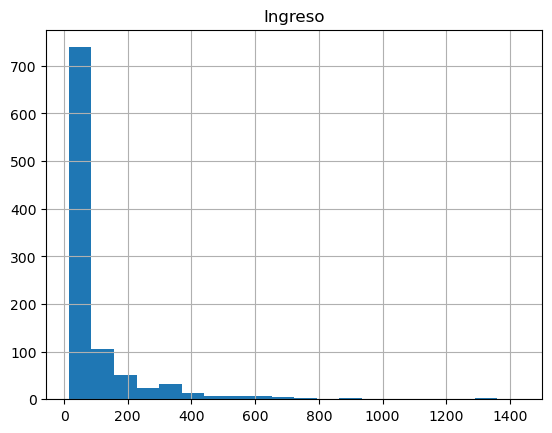

In [43]:
# Histograma
df.hist(bins=20)

Lo que podemos ver es que hay algunos outliers a partir de los 500, pero es evidente que una grandísima parte de la población se concentra en el primer bin.

<AxesSubplot:>

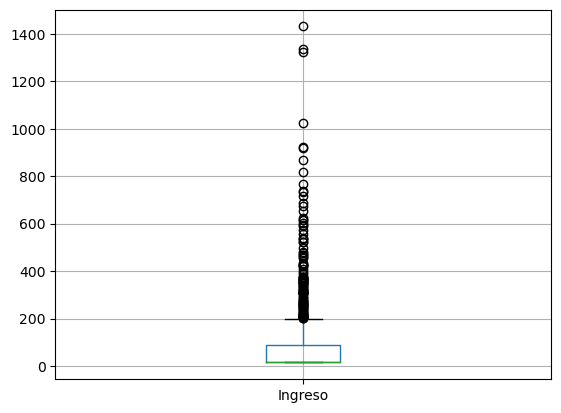

In [39]:
# Box plot
# Lo tuve que redefinir pues el df anterior es una serie y este técnicamente no.
# Las series no pueden tener boxplot en pandas.

df = pd.read_csv('databases/ingresos.txt')
df.boxplot()

Lo que podemos observar en este boxplot es que hay muchísimos outliers, ya que, como vimos antes, el 46.1% gana el mínimo, 15, mientras que otros ganan arriba de los varios cienes.

f) ¿Cree que los datos podrían provenir de una población con distribución normal?


No, esto no se corresponde con una distribución normal. Lo podemos ver fácilmente con un qq plot

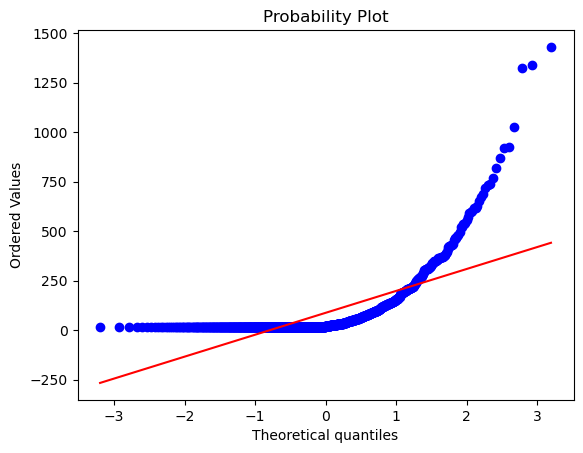

In [50]:
# Hago el qq plot de mi df contra el de una normal con los parametros de media y desvio
from scipy.stats import probplot
from matplotlib import pyplot as plt

probplot(df["Ingreso"], dist="norm", plot=plt)
plt.show()

Como podemos ver, no está ni remotamente cerca de ser una normal. Esto se debe a que concentra muchísimos valores no tan cerca de la media muestral (que tomamos como esperanza), el 46.1% tiene valor 15 y la media muestral es 87. Además, la mediana difiere enormemente con la media, 18 es el valor de la mediana.